In [127]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from urllib.request import urlopen
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
html = 'https://en.wikipedia.org/wiki/Special_wards_of_Tokyo'
result = requests.get(html).text
soup = BeautifulSoup(result,'xml')
table = soup.find('table',{'class':'wikitable sortable'})

In [3]:
column_name = ['Name','Density','Population','Major_district']
df = pd.DataFrame(columns = column_name)

In [93]:
name=[]
pop = []
density = []
major_dist = []

for row in table.findAll('tr'):
    Ward = row.findAll('td')
    if len(Ward)==8: 
        name.append(Ward[2])
        pop.append(Ward[4])
        density.append(Ward[5].find(text=True))
        major_dist.append(Ward[7].find(text=True))

density[0] = '5100'
new_density = []
for i in range(len(density)):
    x=density[i].replace(',','')
    new_density.append(x)

new_density = [int(x) for x in new_density]


new_name = []
for i in range(len(name)):
    names = name[i].findAll('a')
    new_name.append(names)

new_name = [item for sublist in new_name for item in sublist]
#print (new_name)

name1 = []
for i in new_name:
    name1.append(i.get('title'))
#print (name1)
name2 = []

replace = {'Chiyoda, Tokyo':'Chiyoda', 'Chūō, Tokyo':'Chuo', 'Minato, Tokyo':'Minato', 
            'Sumida, Tokyo':'Sumida', 'Koto, Tokyo':'Koto', 'Ōta, Tokyo':'Ota', 
            'Nakano, Tokyo':'Nakano', 'Kita, Tokyo':'Kita', 'Arakawa, Tokyo':'Arakawa', 
            'Adachi, Tokyo':'Adachi', 'Edogawa, Tokyo':'Edogawa'}

name2 = [replace.get(n,n) for n in name1]
#print(name2)

#print(pop)
new_pop = []
for i in range(len(pop)):
    #print(pop[i])
    pops = pop[i].text[1:9]
    new_pop.append(pops)
#print(new_pop)
new_population = []
for i in range(len(new_pop)):
    x = new_pop[i].replace(',','')
    new_population.append(x)
new_population = [int(x) for x in new_population]

replace_districts = {'Nagatachō':'Nagatacho', 'Hongō':'Hongo', 'Kinshichō':'Kinshicho', 'Ōmori': 'Omori', 
                     'Kōenji':'Koenji', 'Arakawa, Machiya,':'Arakawa', 'Ayase,':'Ayase', 'Kasai, Koiwa\n':'Kasai'}
major_district = []

major_district = [replace_districts.get(n,n) for n in major_dist]

#make dataframe
df['Name'] = name2
df['Density'] = new_density
df['Population'] = new_population
df['Major_district'] = major_district

df.tail()

,Name,Density,Population,Major_district
18,Itabashi,17670,569225,Itabashi
19,Nerima,15120,726748,Nerima
20,Adachi,12660,674067,"Ayase,"
21,Katsushika,12850,447140,Tateishi
22,Edogawa,13750,685899,Kasai


In [107]:
def get_geocode(postal_code):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Tokyo,Japan'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

geo_df=pd.read_csv('tokyo_coord.csv')
geo_df = geo_df[geo_df.columns[0:3]]
#geo_df.head()

Tokyo = pd.merge(df,geo_df,on='Name')
Tokyo

,Name,Density,Population,Major_district,Latitude,Longitude
0,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
1,Chuo,14460,147620,Nihonbashi,35.684058,139.774501
2,Minato,12180,248071,Odaiba,35.619128,139.779403
3,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632
4,Bunkyō,19790,223389,Hongo,35.708800,139.760100
5,Taitō,19830,200486,Ueno,35.711788,139.776096
6,Sumida,18910,260358,Kinshicho,35.696752,139.814151
7,Koto,12510,502579,Kiba,35.672200,139.806100
8,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910
9,Meguro,19110,280283,Meguro,35.621250,139.688014


In [110]:
Tokyo = Tokyo.sort_values('Population',ascending=False)
Tokyo = Tokyo[0:6]
Tokyo = Tokyo.drop(Tokyo.index[4])
Tokyo

,Name,Density,Population,Major_district,Latitude,Longitude
11,Setagaya,15690,910868,Setagaya,35.646096,139.656270
19,Nerima,15120,726748,Nerima,35.748360,139.638735
10,Ota,11910,722608,Omori,35.588400,139.727900
22,Edogawa,13750,685899,Kasai,35.663400,139.873100
14,Suginami,16750,570483,Koenji,35.704942,139.649909


In [111]:

from geopy.geocoders import Nominatim
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
Tokyo_latitude = location.latitude
Tokyo_longitude = location.longitude
print('The geograpical coordinates of Tokyo are {}, {}.'.format(Tokyo_latitude, Tokyo_longitude))

The geograpical coordinates of Tokyo are 35.6828387, 139.7594549.


In [112]:
import folium
Tokyo_5Wards = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=10)

for lat, lng, label in zip(Tokyo['Latitude'], Tokyo['Longitude'], 
                           Tokyo['Major_district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3187cc',
        fill_opacity=0.8).add_to(Tokyo_5Wards) 
Tokyo_5Wards

In [113]:
CLIENT_ID = 'XYUAFP4CA5JA5NR3VY11WZLCGJGNHSTRND4Y4RHAF2BO1XBZ' 
CLIENT_SECRET = 'Y0J4NBCK0AXPJPMX2VRTB1LG5DS0BXJINQQK1PMB31PNIT0Y' 
VERSION = '20180604'

In [114]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=600
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [115]:
Tokyo_venues = getNearbyVenues(names=Tokyo['Major_district'],
                                   latitudes=Tokyo['Latitude'],
                                   longitudes=Tokyo['Longitude'])

Setagaya
Nerima
Omori
Kasai
Koenji


In [116]:
Tokyo_venues.head()

,District,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Setagaya,35.646096,139.65627,Asahiya Parlor (旭屋パーラー),35.645966,139.656110,Tea Room
1,Setagaya,35.646096,139.65627,Boulangerie Sudo (ブーランジェリー スドウ),35.643927,139.655058,Bakery
2,Setagaya,35.646096,139.65627,MERCI BAKE (メルシーベイク),35.643533,139.655419,Cupcake Shop
3,Setagaya,35.646096,139.65627,松波ラーメン店,35.644012,139.655817,Ramen Restaurant
4,Setagaya,35.646096,139.65627,シチューのお店 ヒポポタマス,35.644480,139.655650,Diner


In [117]:
Tokyo_restaurant = Tokyo_venues[Tokyo_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Tokyo_restaurant.index = np.arange(1, len(Tokyo_restaurant)+1)
Tokyo_restaurant.tail()

,District,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
104,Koenji,35.704942,139.649909,そば うどん 江戸丸,35.704119,139.654871,Soba Restaurant
105,Koenji,35.704942,139.649909,中華そば JAC,35.706357,139.654647,Ramen Restaurant
106,Koenji,35.704942,139.649909,Ramen Yamatoki (らぁめん 山と樹),35.703525,139.654921,Ramen Restaurant
107,Koenji,35.704942,139.649909,Spice Curry Seiran (スパイスカレー青藍),35.709476,139.649947,Japanese Curry Restaurant
108,Koenji,35.704942,139.649909,Mamekujira (豆くじら),35.709553,139.651927,Japanese Curry Restaurant


In [118]:
from sklearn.cluster import KMeans
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

In [120]:

map_clusters = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11)

Districts = ['Setagaya', 'Nerima', 'Omori', 'Kasai', 'Koenji']
x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

for lat, lon, poi, distr in zip(Tokyo_restaurant['Venue Latitude'], Tokyo_restaurant['Venue Longitude'], Tokyo_restaurant['Venue Category'], Tokyo_restaurant['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [121]:
print (Tokyo_venues['Venue Category'].value_counts())

Convenience Store                43
Sake Bar                         27
Ramen Restaurant                 19
Café                             19
BBQ Joint                        12
Chinese Restaurant                9
Japanese Restaurant               9
Soba Restaurant                   8
Grocery Store                     8
Italian Restaurant                8
Indian Restaurant                 8
Coffee Shop                       7
Park                              7
Bar                               6
Supermarket                       6
Fast Food Restaurant              5
Discount Store                    5
Bakery                            5
Noodle House                      4
Theme Park Ride / Attraction      4
Bus Stop                          4
Tempura Restaurant                4
Steakhouse                        4
Pharmacy                          4
Hotel                             4
Arcade                            4
Liquor Store                      3
Drugstore                   

In [160]:
Tokyo_Top10 = Tokyo_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_Top10=Tokyo_Top10.reset_index()
Tokyo_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
Tokyo_Top10

,Venue Category,Frequency
0,Convenience Store,43
1,Sake Bar,27
2,Ramen Restaurant,19
3,Café,19
4,BBQ Joint,12
5,Chinese Restaurant,9
6,Japanese Restaurant,9
7,Soba Restaurant,8
8,Grocery Store,8
9,Italian Restaurant,8


Text(0.5, 1.0, 'frequent venues in 5 wards')

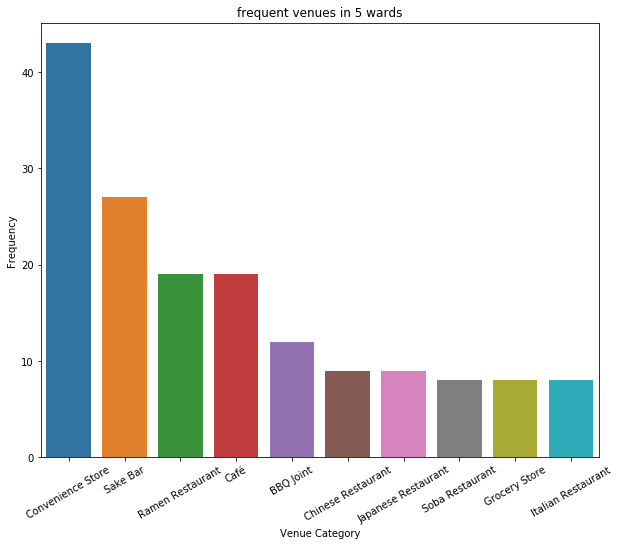

In [133]:
fig = plt.figure(figsize=(10,8))
res=sns.barplot(x='Venue Category', y='Frequency', data=Tokyo_Top10)
res.set_xticklabels(res.get_xticklabels(), rotation=30)
plt.title('frequent venues in 5 wards')

In [156]:
Tokyo_restaurant_Top10 = Tokyo_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_restaurant_Top10 = Tokyo_restaurant_Top10.reset_index()
Tokyo_restaurant_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)

Text(0.5, 1.0, 'frequent restaurant venues in 5 wards')

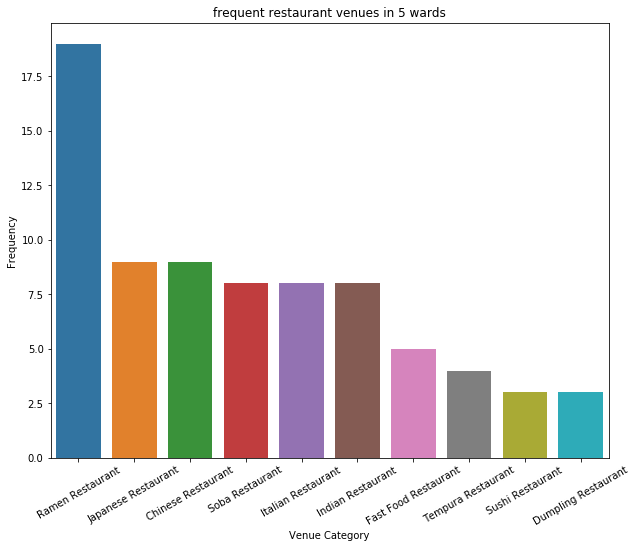

In [159]:
fig = plt.figure(figsize=(10,8))
res=sns.barplot(x='Venue Category', y='Frequency', data=Tokyo_restaurant_Top10)
res.set_xticklabels(res.get_xticklabels(), rotation=30)
plt.title('frequent restaurant venues in 5 wards')

In [165]:
Tokyo_onehot = pd.get_dummies(Tokyo_venues[['Venue Category']], prefix="", prefix_sep="")
Tokyo_onehot['District'] = Tokyo_venues['District'] 
cols=list(Tokyo_onehot.columns.values)
cols.pop(cols.index('District'))
Tokyo_onehot=Tokyo_onehot[['District']+cols]
Tokyo_onehot.rename(columns = {'District': 'Districts'}, inplace = True)
Tokyo_onehot.shape

Tokyo_Venues_Grouped = Tokyo_onehot.groupby('Districts').mean().reset_index()
Tokyo_Venues_Grouped.index = np.arange(1, len(Tokyo_Venues_Grouped)+1)
Tokyo_Venues_Grouped

,Districts,ATM,American Restaurant,Arcade,Art Gallery,BBQ Joint,Bakery,Bar,Bath House,Beer Bar,...,Toy / Game Store,Tram Station,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
1,Kasai,0.00,0.00,0.012987,0.000000,0.038961,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.012987,0.00,0.012987,0.00,0.00,0.00
2,Koenji,0.00,0.01,0.010000,0.000000,0.040000,0.010000,0.05,0.010000,0.020000,...,0.01,0.000000,0.01,0.000000,0.000000,0.01,0.000000,0.01,0.02,0.01
3,Nerima,0.00,0.00,0.000000,0.000000,0.033333,0.033333,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00
4,Omori,0.02,0.00,0.020000,0.000000,0.040000,0.000000,0.01,0.000000,0.000000,...,0.00,0.000000,0.02,0.000000,0.000000,0.00,0.010000,0.00,0.00,0.01
5,Setagaya,0.00,0.00,0.000000,0.018519,0.000000,0.055556,0.00,0.018519,0.018519,...,0.00,0.037037,0.00,0.018519,0.018519,0.00,0.000000,0.00,0.00,0.00


In [167]:
num_top_venues = 5

for hood in Tokyo_Venues_Grouped['Districts']:
    print("----"+hood+"----")
    temp = Tokyo_Venues_Grouped[Tokyo_Venues_Grouped['Districts'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Kasai----
                  venue  freq
0     Convenience Store  0.26
1      Ramen Restaurant  0.08
2         Grocery Store  0.06
3  Fast Food Restaurant  0.05
4    Donburi Restaurant  0.04


----Koenji----
                venue  freq
0            Sake Bar  0.15
1                Café  0.09
2    Ramen Restaurant  0.07
3                 Bar  0.05
4  Italian Restaurant  0.05


----Nerima----
                          venue  freq
0             Convenience Store  0.17
1  Theme Park Ride / Attraction  0.13
2            Chinese Restaurant  0.07
3                          Café  0.07
4                  Intersection  0.07


----Omori----
               venue  freq
0           Sake Bar  0.09
1  Convenience Store  0.07
2        Coffee Shop  0.06
3    Soba Restaurant  0.05
4     Discount Store  0.04


----Setagaya----
               venue  freq
0  Convenience Store  0.19
1             Bakery  0.06
2               Café  0.06
3           Bus Stop  0.06
4       Tram Station  0.04




In [182]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Districts']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

District_venues_sorted = pd.DataFrame(columns=columns)
District_venues_sorted['Districts'] = Tokyo_Venues_Grouped['Districts']

for ind in np.arange(Tokyo_Venues_Grouped.shape[0]):
    District_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_Venues_Grouped.iloc[ind, :], num_top_venues)

District_venues_sorted.head()

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Kasai,Convenience Store,Ramen Restaurant,Grocery Store,Fast Food Restaurant,Donburi Restaurant,Pharmacy,BBQ Joint,Indian Restaurant,Steakhouse,Japanese Restaurant
2,Koenji,Sake Bar,Café,Ramen Restaurant,Italian Restaurant,Bar,BBQ Joint,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Rock Club
3,Nerima,Convenience Store,Theme Park Ride / Attraction,Intersection,Park,Chinese Restaurant,Café,Sake Bar,Grocery Store,Pharmacy,Drugstore
4,Omori,Sake Bar,Convenience Store,Coffee Shop,Soba Restaurant,Ramen Restaurant,Japanese Restaurant,Discount Store,Café,BBQ Joint,Indian Restaurant
5,Setagaya,Convenience Store,Café,Bus Stop,Bakery,Tram Station,Ramen Restaurant,Intersection,Noodle House,Restaurant,Concert Hall


In [183]:
from sklearn.cluster import KMeans

kclusters = 5

Tokyo_grouped_clustering = Tokyo_Venues_Grouped.drop('Districts', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)
District_venues_sorted.rename(columns={'Districts':'Districts'},inplace=True)
District_venues_sorted.head()

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Kasai,Convenience Store,Ramen Restaurant,Grocery Store,Fast Food Restaurant,Donburi Restaurant,Pharmacy,BBQ Joint,Indian Restaurant,Steakhouse,Japanese Restaurant
2,Koenji,Sake Bar,Café,Ramen Restaurant,Italian Restaurant,Bar,BBQ Joint,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Rock Club
3,Nerima,Convenience Store,Theme Park Ride / Attraction,Intersection,Park,Chinese Restaurant,Café,Sake Bar,Grocery Store,Pharmacy,Drugstore
4,Omori,Sake Bar,Convenience Store,Coffee Shop,Soba Restaurant,Ramen Restaurant,Japanese Restaurant,Discount Store,Café,BBQ Joint,Indian Restaurant
5,Setagaya,Convenience Store,Café,Bus Stop,Bakery,Tram Station,Ramen Restaurant,Intersection,Noodle House,Restaurant,Concert Hall


In [185]:
Tokyo_merged = Tokyo

Tokyo_merged['Cluster Labels'] = kmeans.labels_

Tokyo_merged = Tokyo_merged.join(District_venues_sorted.set_index('Districts'), on='Major_district')

Tokyo_merged

,Name,Density,Population,Major_district,Latitude,Longitude,Cluster Labels,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Setagaya,15690,910868,Setagaya,35.646096,139.656270,3,3,Convenience Store,Café,Bus Stop,Bakery,Tram Station,Ramen Restaurant,Intersection,Noodle House,Restaurant,Concert Hall
19,Nerima,15120,726748,Nerima,35.748360,139.638735,4,4,Convenience Store,Theme Park Ride / Attraction,Intersection,Park,Chinese Restaurant,Café,Sake Bar,Grocery Store,Pharmacy,Drugstore
10,Ota,11910,722608,Omori,35.588400,139.727900,2,2,Sake Bar,Convenience Store,Coffee Shop,Soba Restaurant,Ramen Restaurant,Japanese Restaurant,Discount Store,Café,BBQ Joint,Indian Restaurant
22,Edogawa,13750,685899,Kasai,35.663400,139.873100,1,1,Convenience Store,Ramen Restaurant,Grocery Store,Fast Food Restaurant,Donburi Restaurant,Pharmacy,BBQ Joint,Indian Restaurant,Steakhouse,Japanese Restaurant
14,Suginami,16750,570483,Koenji,35.704942,139.649909,0,0,Sake Bar,Café,Ramen Restaurant,Italian Restaurant,Bar,BBQ Joint,Chinese Restaurant,Dumpling Restaurant,Mexican Restaurant,Rock Club


In [186]:
map_clusters = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_merged['Latitude'], 
                                  Tokyo_merged['Longitude'], 
                                  Tokyo_merged['Major_district'], 
                                  Tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [189]:

map_clusters = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11)

Districts = ['Setagaya', 'Nerima', 'Omori', 'Kasai', 'Koenji']
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

for lat, lon, poi, cluster in zip(Tokyo_merged['Latitude'], Tokyo_merged['Longitude'], Tokyo_merged['Major_district'],Tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters